In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import glob
from utils import *

In [7]:
#Data storage, loading partcles positions
plane = 'beads/'
folder1 = 'multiplane/res_beads/'#_'+plane
folder2 = 'multiplane/img/'
poly_file = 'data/polynomials_2022.txt'

In [3]:
# Measurded data
beads = np.array([np.sqrt(9.959999999999999*9.028571428571428),
np.sqrt(8.178571428571429*7.472857142857144),
np.sqrt(6.195*5.525714285714287),
np.sqrt(4.48642857142857*3.9221428571428567),
np.sqrt(2.5614285714285714*1.7657142857142858),
np.sqrt(1.7114285714285717*1.385)])

std_beads = np.array([0.04317*9.02857+9.95999*0.13181,
0.00959*7.47285+8.17857*0.009663,
0.0301678*5.5257142+6.195*0.02881,
0.0204372*3.92214+4.48642*0.020031,
0.0040122*1.76571+2.561428*0.0067673,
0.01224081*1.385+1.71142*0.0171249])/beads

std_beads2 =  np.array([0.04317*9.02857+9.95999*0.13181,
0.00959*7.47285+8.17857*0.009663,
0.0301678*5.5257142+6.195*0.02881,
0.0204372*3.92214+4.48642*0.020031,
0.0040122*1.76571+2.561428*0.0067673,
0.01224081*1.385+1.71142*0.0171249])

sizes_ind = np.asarray([[1,2,3,4,5,6],[6,5,4,3,2,1],[6,2,4,5,3,0],[1,6,2,5,3,4],
         [4,1,3,6,2,5],[3,5,4,0,6,2],[3,6,4,1,5,2],[4,3,5,6,2,1],
         [2,4,6,1,5,3],[5,2,6,4,0,3]])-1

sizes_ind[2][5] = -1
sizes_ind[5][3] = -1
sizes_ind[9][4] = -1

yr = np.asarray([[ 0.,  1.,  7.,  9., 18., 20.],[3.,  6.,  8., 12., 12.8,  16.],
                 [ -0.5, 1.5, 4.4, 7.2, 12.4, 13.],[ 2.,  7.,  8., 13., 17., 20.],
                 [3., 5., 10., 12., 15.5, 17.5],[ -1., 2.2,  5.8,  9.,  10., 14.],
                 [1.8, 4., 5.8, 11., 14.8, 17.],[0., 5., 7., 11., 15.5, 17.5],
                 [1.5, 5.5, 9.5, 11.2, 14., 19.] ,[0.8, 4.8, 10.2, 13.2, 15., 18.2] ])-3.
x0 = np.asarray([-10.,-10.,-8.,-7.,-3.,0.,5.,8.,9.,10.])-13.5
z0 =  np.asarray([8.,-2.,-4.,6.,0.,0.,6.,8.,-3.,2.])-0.4

xr = np.zeros_like(yr)
zr = np.zeros_like(yr)
size_r = np.zeros_like(yr)
for i in range(len(yr)):
    for j in range(6):
        xr[i][j] = x0[i]
        zr[i][j] = z0[i]
        size_r[i][j] = beads[sizes_ind[i][j]]
size_r[2][5] = np.nan
size_r[5][3] = np.nan
size_r[9][4] = np.nan
xr[2][5] = np.nan
xr[5][3] = np.nan
xr[9][4] = np.nan
yr[2][5] = np.nan
yr[5][3] = np.nan
yr[9][4] = np.nan
zr[2][5] = np.nan
zr[5][3] = np.nan
zr[9][4] = np.nan

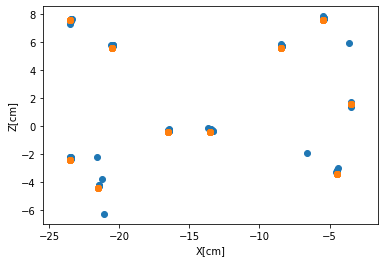

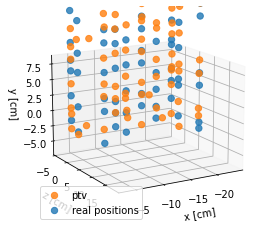

95.28133706151277


In [24]:
# Load calculated parameters for transformation
p = magnification(poly_file)
# Calculate Intensity maxima of the whole sample

# Correct name for target files
name_feat = folder2 + 'beads_'
max_gray = obtain_intensity_maxima(name_feat)

# Loading data and data storage
name = folder1+'rt_is.10001'
a = np.loadtxt(name, skiprows=1)

#Separate data into coordinates, add offset  between ptv and real positions(systematic error) 
x = a[:,1]/10.
y = a[:,2]/10.
z = a[:,3]/10.

d_E = np.zeros(len(a))
gray_sum = np.zeros(len(a))

##second function to adjust for gray level and size
for i in range(len(a)):
        #Scale pixel to world with z position
        scale = [p[j](a[i][3])*0.1 for j in range(4)]
        #Find ID in each camera
        ID = np.array([int(a[i][4]),int(a[i][5]),int(a[i][6]),int(a[i][7])],dtype=int)
        #Use ID values to obtain axis lengths and intensity
        al, b, gray = obtain_values_from_ID(ID,scale,name_feat)
        gray_sum[i] = gray
        d_E[i] = np.sqrt(al*b)/resize(gray_sum[i]/max_gray,np.sqrt(al*b))
    

plt.figure(1)
plt.scatter(x,z,label='ptv')
plt.scatter(xr,zr,label='real')
plt.axis('equal')
plt.axis('equal')
plt.xlabel('X[cm]')
plt.ylabel('Z[cm]')

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='y', s=40, c='C1', alpha=0.8, label='ptv')
ax.scatter(xr, yr, zr, zdir='y', s=40, c='C0', alpha=0.8, label='real positions')
ax.legend()

ax.view_init(15,60)
ax.set_xlabel('x [cm]')
ax.set_ylabel('z [cm]')
ax.set_zlabel('y [cm]')

plt.show()
print(np.max(gray_sum))

In [11]:
i_d = d_E.argsort()

In [13]:
indi = size_r.flatten().argsort()

In [22]:
shift = abs(d_E[i_d][d_E[i_d]>1]-size_r.flatten()[indi][1:])/size_r.flatten()[indi][1:]
print('Maximum estimation error is:', np.nanmax(shift))

Maximum estimation error is: 0.3331938825451287


In [17]:
est_size = d_E[i_d][d_E[i_d]>1]

Text(0, 0.5, 'Estimated size [mm]')

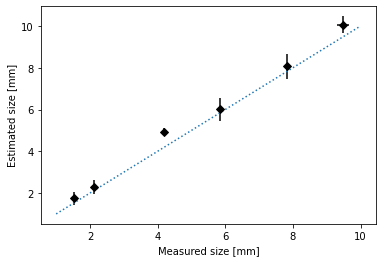

In [19]:
for i in range(6):
    size_dummy = est_size[i*10:(i+1)*10]
    plt.errorbar(beads[5-i],size_dummy.mean(),yerr=size_dummy.std(),xerr=std_beads[5-i],fmt='kD')
plt.plot([1,10],[1,10],':')
plt.xlabel('Measured size [mm]')
plt.ylabel('Estimated size [mm]')